## Imports

In [1]:
import argparse
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import pickle

## Settings

In [2]:
dir_cntrl = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo/ts/'

fin_cntrl = 'f.e.FTORCHmjo_CNTRLmjo.cam.h0.V.plev.197901-201012.nc'

var_cntrl = 'V'

file_path_cntrl = os.path.join(dir_cntrl, fin_cntrl)  # Join the directory and file name

DS_cntrl = xr.open_dataset(file_path_cntrl)

In [3]:
FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.U*AllSeason_vertical_RMSE_*.pkl'))

U_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.U*AllSeason_vertical_RMSE_*.pkl'))

U_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.U*AllSeason_vertical_RMSE_*.pkl'))

U_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.V*AllSeason_vertical_RMSE_*.pkl'))

V_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.V*AllSeason_vertical_RMSE_*.pkl'))

V_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.V*AllSeason_vertical_RMSE_*.pkl'))

V_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.T*AllSeason_vertical_RMSE_*.pkl'))

T_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.T*AllSeason_vertical_RMSE_*.pkl'))

T_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.T*AllSeason_vertical_RMSE_*.pkl'))

T_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

#########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.Q*AllSeason_vertical_RMSE_*.pkl'))

Q_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.Q*AllSeason_vertical_RMSE_*.pkl'))

Q_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.Q*AllSeason_vertical_RMSE_*.pkl'))

Q_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])



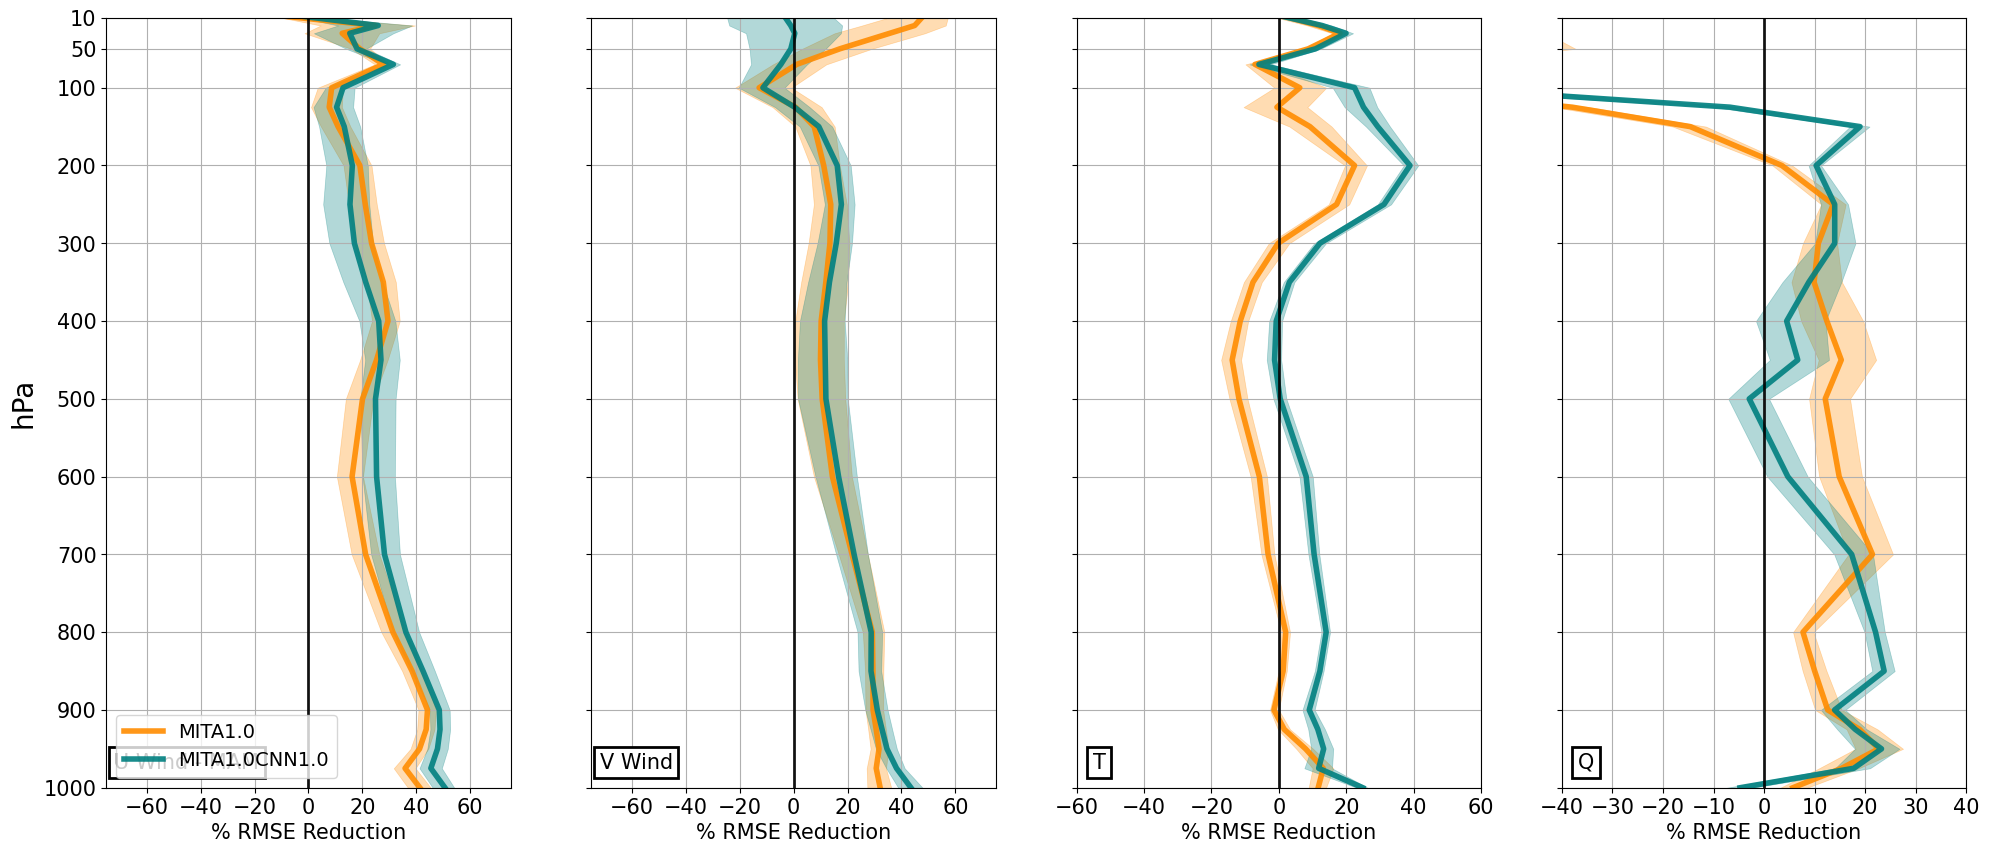

In [8]:

bbox_props = dict(fc="white", ec="k", lw=2)
SEAS='MAM'
SeasDict = {'DJF': 0, 'SON': 1, 'JJA': 2, 'MAM': 3}
td = SeasDict[SEAS]


fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
# ax1.plot(np.mean(U_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0MJO1.0',linewidth=4, alpha=0.9, color='navy')
# ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
ax1.text(0.02, 0.02, f'U Wind - {SEAS}', transform=ax1.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
# ax2.plot(np.mean(V_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
ax2.text(0.02, 0.02, f'V Wind', transform=ax2.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
# ax3.plot(np.mean(T_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)
ax3.text(0.04, 0.02, f'T', transform=ax3.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)


################################################################

################################################################
# ax4.plot(np.mean(Q_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)
ax4.text(0.04, 0.02, f'Q', transform=ax4.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)


### +++ saving
plt.savefig(f'./{SEAS}_Vert_AllSeason_vertical_RMSEperc.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

## Read in the XLS files and combine:

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

'/glade/work/wchapman/DA_ML/CESML_AI/Paper_Figures_GRL/Vert_RMSE'

In [10]:
# outdir = '/glade/u/home/wchapman/ADF/RMSE_text/'
outdir = '/glade/work/wchapman/DA_ML/notebooks/Figures/Increment_XLSX/'
exp_name = ['MITA1.0','MITA1.0MJO1.0','MITA1.0CNN1.0','exp0008']
which_exp = 'MITA1.0'
mod_in3 = 'f.e.FTORCHmjo_meanGPU_exp001'
mod_in = 'f.e.FTORCHmjo_MEANmjo'
mod_in2 = 'f.e.FTORCHmjo_CNNmjo'

## Functions for reading in Pandas Datafram

In [11]:
def Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3):
    path = outdir
    ADFS = [path+'STOCHAI_SPPT/'+varname+'_surfmb_obsvar_'+obsname+'_'+mod_in+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_surfmb_obsvar_'+obsname+'_'+mod_in2+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_surfmb_obsvar_'+obsname+'_'+mod_in3+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_surfmb_obsvar_'+obsname+'_'+mod_in+'.xlsx']
    model_A = exp_name 

    for ee,moload in enumerate(ADFS):
        model = model_A[ee]
        DF = pd.read_excel(moload,names=['Season','Area','Percent','RMSE','Fifth'])
        ###settings 

        DF_global = DF[DF['Area']==area].reset_index(drop=True)
        DF_global['NinetyFifth'] = DF.iloc[(np.array(DF.index[DF['Area']==area].tolist())+1)]['Fifth'].values
        monlist = ['DJF','MAM','JJA','SON','ANN']
        DF_global['Season']=monlist
        DF_global['Variable']=vary
        DF_global['Experiment']=model
        arr = np.array(DF_global['Percent'])
        arr = np.array([float(x[:-1]) for x in arr])
        arr = arr/100
        DF_global['PI'] = arr
        DF_global['RMSE_free'] = -1*(DF_global['RMSE']/(DF_global['PI']-1))
        DF_global['Fifth_Perc'] = (DF_global['RMSE_free']-DF_global['Fifth'])/DF_global['RMSE_free']
        DF_global['NinetyFifth_Perc'] = (DF_global['RMSE_free']-DF_global['NinetyFifth'])/DF_global['RMSE_free']
        DF_global_DA00 = DF_global
        
        
        DF_global['PI']=DF_global['PI']*100
        DF_global['Fifth_Perc']=DF_global['Fifth_Perc']*100
        DF_global['NinetyFifth_Perc']=DF_global['NinetyFifth_Perc']*100
        
        if ee == 0: 
            DF_tot = DF_global 
        else: 
            DF_tot
            DF_tot = pd.concat([DF_tot, DF_global], ignore_index=True)
    return DF_tot

def Build_Tab_UL(vary,area,varname,obsname,mod_in,mod_in2,mod_in3):
    path = outdir
    ADFS = [path+'STOCHAI_SPPT/'+varname+'_obsvar_'+obsname+'_'+mod_in+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_obsvar_'+obsname+'_'+mod_in2+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_obsvar_'+obsname+'_'+mod_in3+'.xlsx',\
            path+'STOCHAI_SPPT/'+varname+'_obsvar_'+obsname+'_'+mod_in+'.xlsx']
    model_A = exp_name 

    for ee,moload in enumerate(ADFS):
        model = model_A[ee]
        DF = pd.read_excel(moload,names=['Season','Area','Percent','RMSE','Fifth'])
        ###settings 

        DF_global = DF[DF['Area']==area].reset_index(drop=True)
        DF_global['NinetyFifth'] = DF.iloc[(np.array(DF.index[DF['Area']==area].tolist())+1)]['Fifth'].values
        monlist = ['DJF','MAM','JJA','SON','ANN']
        DF_global['Season']=monlist
        DF_global['Variable']=vary
        DF_global['Experiment']=model
        
        arr = np.array(DF_global['Percent'])
        arr = np.array([float(x[:-1]) for x in arr])
        arr = arr/100
        DF_global['PI'] = arr
        
        arr = np.array(DF_global['RMSE'])
        arr = np.array([float(x[:]) for x in arr])
        DF_global['RMSE']=arr
        
        arr = np.array(DF_global['Fifth'])
        arr = np.array([float(x[:]) for x in arr])
        DF_global['Fifth']=arr
        
        arr = np.array(DF_global['NinetyFifth'])
        arr = np.array([float(x[:]) for x in arr])
        DF_global['NinetyFifth']=arr
        
        DF_global['RMSE_free'] = -1*(DF_global['RMSE']/(DF_global['PI']-1))
        DF_global['Fifth_Perc'] = (DF_global['RMSE_free']-DF_global['Fifth'])/DF_global['RMSE_free']
        DF_global['NinetyFifth_Perc'] = (DF_global['RMSE_free']-DF_global['NinetyFifth'])/DF_global['RMSE_free']
        DF_global_DA00 = DF_global
        
        
        DF_global['PI']=DF_global['PI']*100
        DF_global['Fifth_Perc']=DF_global['Fifth_Perc']*100
        DF_global['NinetyFifth_Perc']=DF_global['NinetyFifth_Perc']*100
        
        if ee == 0: 
            DF_tot = DF_global 
        else: 
            DF_tot = pd.concat([DF_tot, DF_global], ignore_index=True)
    return DF_tot


In [12]:
#T2m
vary = 'T2m'
area = 'Land'
varname='TREFHT'
obsname='t2m'
T2m_DF = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)

#Precip GPCP
vary = 'P-GPCP'
area = 'Global'
varname='PRECT'
obsname='precip'
PGPCP_DF = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)

#Precip GPCP
vary = 'P-GPCP'
area = 'Land'
varname='PRECT'
obsname='precip'
PGPCP_DF_land = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)

#Precip Tropics
vary = 'P-GPCP'
area = 'Tropics'
varname='PRECT'
obsname='precip'
PGPCP_DF_Tropics = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)


#Precip ERAi
vary = 'P-ERAi'
area = 'Global'
varname='PRECT'
obsname='tp'
PERAi_DF = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)

#PSL ERAi
vary = 'PSL'
area = 'Global'
varname='PSL'
obsname='msl'
PSL_DF = Build_Tab(vary,area,varname,obsname,mod_in,mod_in2,mod_in3)

DF_tot = pd.concat([T2m_DF, PGPCP_DF, PGPCP_DF_land, PGPCP_DF_Tropics, PERAi_DF, PSL_DF], ignore_index=True)
DF_tot

,Season,Area,Percent,RMSE,Fifth,NinetyFifth,Variable,Experiment,PI,RMSE_free,Fifth_Perc,NinetyFifth_Perc
0,DJF,Land,16.67%,1.735,1.699,1.782,T2m,MITA1.0,16.67,2.082083,18.399037,14.412646
1,MAM,Land,-0.75%,1.756,1.733,1.794,T2m,MITA1.0,-0.75,1.742928,0.569618,-2.930239
2,JJA,Land,3.83%,2.035,2.014,2.065,T2m,MITA1.0,3.83,2.116045,4.822418,2.412260
3,SON,Land,5.53%,1.741,1.717,1.781,T2m,MITA1.0,5.53,1.842913,6.832286,3.359523
4,ANN,Land,8.61%,1.348,1.328,1.372,T2m,MITA1.0,8.61,1.474997,9.965935,6.982878
...,...,...,...,...,...,...,...,...,...,...,...,...
115,DJF,Global,14.18%,211.048,204.485,223.119,PSL,exp0008,14.18,245.919366,16.848761,9.271481
116,MAM,Global,26.59%,164.559,159.233,174.047,PSL,exp0008,26.59,224.164283,28.965936,22.357390
117,JJA,Global,2.33%,240.445,231.624,248.899,PSL,exp0008,2.33,246.181018,5.913136,-1.104058
118,SON,Global,9.97%,189.455,180.816,198.261,PSL,exp0008,9.97,210.435410,14.075298,5.785343


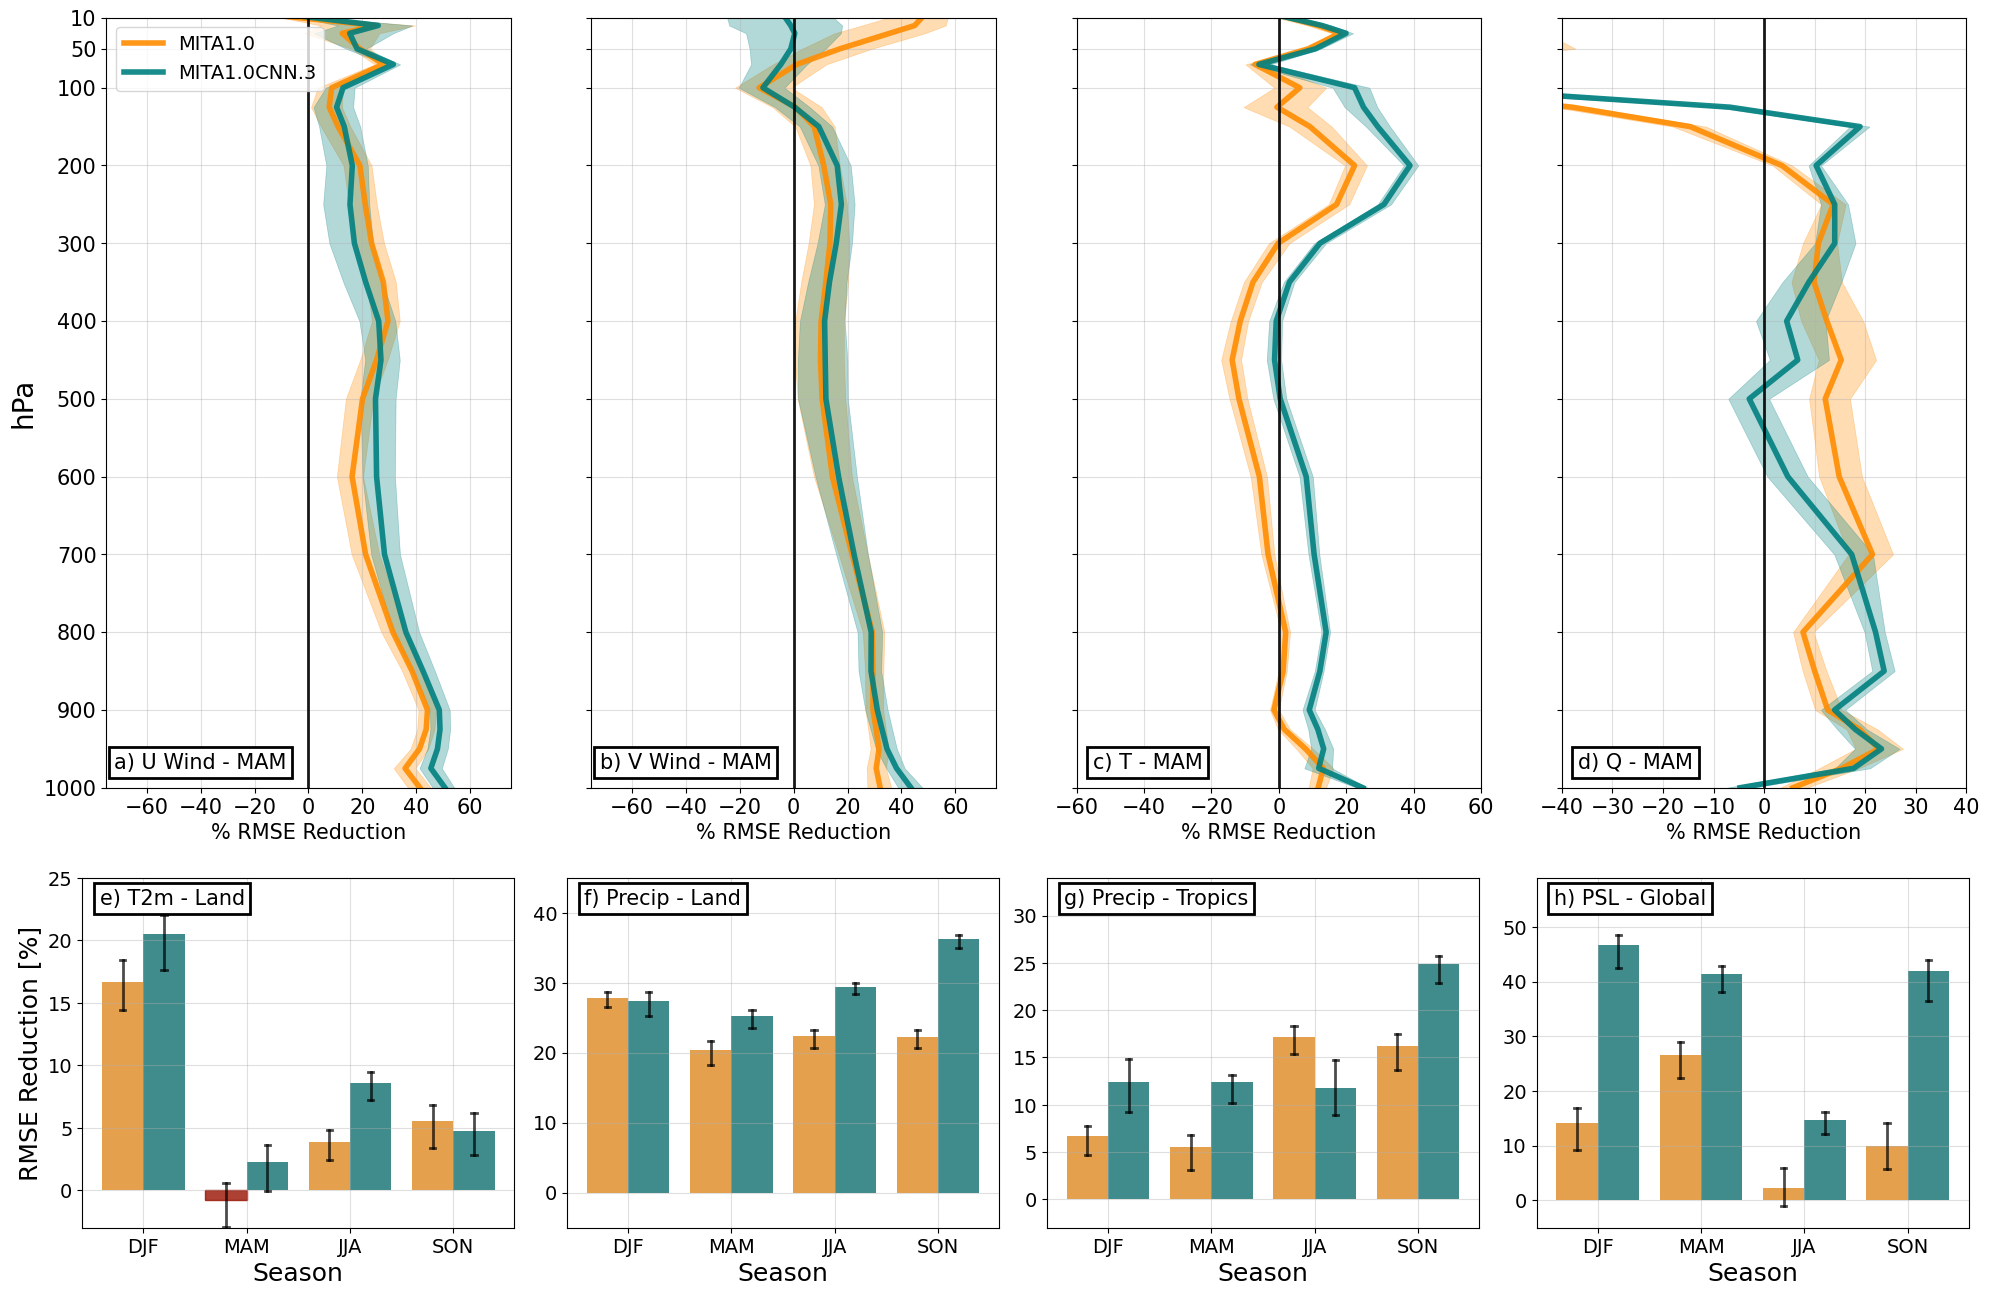

In [23]:

Red_cols = ['#991101','#C23210','#D65F59','#FF8A83']
bbox_props = dict(fc="white", ec="k", lw=2)

SEAS='MAM'
SeasDict = {'DJF': 0, 'SON': 1, 'JJA': 2, 'MAM': 3}
td = SeasDict[SEAS]

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))

ax1.plot(np.mean(U_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

# ax1.plot(np.mean(U_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0MJO1.0',linewidth=4, alpha=0.9, color='navy')
# ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')

ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14, loc='upper left')
ax1.tick_params(labelsize=15) 
ax1.grid(True, alpha=0.4)
ax1.text(0.02, 0.02, f'a) U Wind - {SEAS}', transform=ax1.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
ax2.plot(np.mean(V_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

# ax2.plot(np.mean(V_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True, alpha=0.4)
ax2.text(0.02, 0.02, f'b) V Wind - {SEAS}', transform=ax2.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
ax3.plot(np.mean(T_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

# ax3.plot(np.mean(T_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True, alpha=0.4)
ax3.text(0.04, 0.02, f'c) T - {SEAS}', transform=ax3.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)


################################################################

################################################################
ax4.plot(np.mean(Q_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

# ax4.plot(np.mean(Q_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
# ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True, alpha=0.4)
ax4.text(0.04, 0.02, f'd) Q - {SEAS}', transform=ax4.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################

################################################################

# ax5 = fig.add_axes([0.115, -0.33, 0.18, 0.35])  # Adjust the colorbar position
ax5 = fig.add_axes([0.317, -0.33, 0.18, 0.35])  # Adjust the colorbar position
DF_tot_sel = DF_tot[(DF_tot['Variable']=='P-GPCP')&(DF_tot['Area']=='Land')]
DF_tot_sel = DF_tot_sel[DF_tot_sel['Season']!='ANN']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0008']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0007']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='MITA1.0MJO1.0']

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5),sharex=True,sharey=False)
bar= sns.barplot(ax=ax5,data=DF_tot_sel, x="Season", y="PI", hue="Experiment",palette=["darkorange","teal"],alpha=0.8)
# ax.legend(fontsize=14)
ax5.tick_params(axis='both', which='major', labelsize=14)
ax5.set_ylabel(" ",size=18)
ax5.set_xlabel("Season",size=18)
ax5.set_ylim([-5,45])
ax5.legend([],[], frameon=False)
ax5.grid(True, alpha=0.4)

for ee,bar in enumerate(bar.patches):
        high_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['Fifth_Perc']
        low_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['NinetyFifth_Perc']
        ax5.plot([bar.xy[0]+bar.get_width()/2,bar.xy[0]+bar.get_width()/2],[high_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax5.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[high_,high_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax5.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[low_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)


        if (bar.get_height() < 0) & (ee <= 4):
            bar.set_color(Red_cols[0])

        if (bar.get_height() < 0) & (ee > 4) &(ee <= 9):
            bar.set_color(Red_cols[1])

        if (bar.get_height() < 0) & (ee > 9) &(ee <= 14):
            bar.set_color(Red_cols[2])

        if (bar.get_height() < 0) & (ee > 14):
            bar.set_color(Red_cols[3])
ax5.text(0.04, 0.97, f'f) Precip - Land', transform=ax5.transAxes, ha='left', va='top', fontsize=15, bbox=bbox_props)

################################################################

################################################################

# ax6 = fig.add_axes([0.317, -0.33, 0.18, 0.35])  # Adjust the colorbar position
ax6 = fig.add_axes([0.317+0.2, -0.33, 0.18, 0.35])  # Adjust the colorbar position

DF_tot_sel = DF_tot[(DF_tot['Variable']=='P-GPCP')&(DF_tot['Area']=='Tropics')]
DF_tot_sel = DF_tot_sel[DF_tot_sel['Season']!='ANN']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0008']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0007']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='MITA1.0MJO1.0']

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5),sharex=True,sharey=False)
bar= sns.barplot(ax=ax6,data=DF_tot_sel, x="Season", y="PI", hue="Experiment",palette=["darkorange","teal"],alpha=0.8)
# ax.legend(fontsize=14)
ax6.tick_params(axis='both', which='major', labelsize=14)
ax6.set_ylabel("",size=18)
ax6.set_xlabel("Season",size=18)
ax6.set_ylim([-3,34])
ax6.legend([],[], frameon=False)
ax6.grid(True,alpha=0.4)

for ee,bar in enumerate(bar.patches):
        high_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['Fifth_Perc']
        low_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['NinetyFifth_Perc']
        ax6.plot([bar.xy[0]+bar.get_width()/2,bar.xy[0]+bar.get_width()/2],[high_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax6.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[high_,high_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax6.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[low_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)


        if (bar.get_height() < 0) & (ee <= 4):
            bar.set_color(Red_cols[0])

        if (bar.get_height() < 0) & (ee > 4) &(ee <= 9):
            bar.set_color(Red_cols[1])

        if (bar.get_height() < 0) & (ee > 9) &(ee <= 14):
            bar.set_color(Red_cols[2])

        if (bar.get_height() < 0) & (ee > 14):
            bar.set_color(Red_cols[3])
ax6.text(0.04, 0.97, f'g) Precip - Tropics', transform=ax6.transAxes, ha='left', va='top', fontsize=15, bbox=bbox_props)

################################################################

################################################################

# ax7 = fig.add_axes([0.317+0.2, -0.33, 0.18, 0.35])  # Adjust the colorbar position
ax7 = fig.add_axes([0.317+0.204+0.2, -0.33, 0.18, 0.35])  # Adjust the colorbar position

DF_tot_sel = DF_tot[(DF_tot['Variable']=='PSL')&(DF_tot['Area']=='Global')]
DF_tot_sel = DF_tot_sel[DF_tot_sel['Season']!='ANN']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0008']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0007']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='MITA1.0MJO1.0']


# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5),sharex=True,sharey=False)
bar= sns.barplot(ax=ax7,data=DF_tot_sel, x="Season", y="PI", hue="Experiment",palette=["darkorange","teal"],alpha=0.8)
# ax.legend(fontsize=14)
ax7.tick_params(axis='both', which='major', labelsize=14)
ax7.set_ylabel("",size=18)
ax7.set_xlabel("Season",size=18)
ax7.set_ylim([-5,59])
ax7.legend([],[], frameon=False)
ax7.grid(True,alpha=0.4)

for ee,bar in enumerate(bar.patches):
        high_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['Fifth_Perc']
        low_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['NinetyFifth_Perc']
        ax7.plot([bar.xy[0]+bar.get_width()/2,bar.xy[0]+bar.get_width()/2],[high_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax7.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[high_,high_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax7.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[low_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)


        if (bar.get_height() < 0) & (ee <= 4):
            bar.set_color(Red_cols[0])

        if (bar.get_height() < 0) & (ee > 4) &(ee <= 9):
            bar.set_color(Red_cols[1])

        if (bar.get_height() < 0) & (ee > 9) &(ee <= 14):
            bar.set_color(Red_cols[2])

        if (bar.get_height() < 0) & (ee > 14):
            bar.set_color(Red_cols[3])
ax7.text(0.04, 0.97, f'h) PSL - Global', transform=ax7.transAxes, ha='left', va='top', fontsize=15, bbox=bbox_props)

################################################################

################################################################

# ax8 = fig.add_axes([0.317+0.204+0.2, -0.33, 0.18, 0.35])  # Adjust the colorbar position
ax8 = fig.add_axes([0.115, -0.33, 0.18, 0.35])  # Adjust the colorbar position

DF_tot_sel = DF_tot[(DF_tot['Variable']=='T2m')&(DF_tot['Area']=='Land')]
DF_tot_sel = DF_tot_sel[DF_tot_sel['Season']!='ANN']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0008']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='exp0007']
DF_tot_sel = DF_tot_sel[DF_tot_sel['Experiment']!='MITA1.0MJO1.0']


# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5),sharex=True,sharey=False)
bar= sns.barplot(ax=ax8,data=DF_tot_sel, x="Season", y="PI", hue="Experiment",palette=["darkorange","teal"],alpha=0.8)
# ax.legend(fontsize=14)
ax8.tick_params(axis='both', which='major', labelsize=14)
ax8.set_ylabel("RMSE Reduction [%]",size=18)
ax8.set_xlabel("Season",size=18)
ax8.set_ylim([-3,25])
ax8.legend([],[], frameon=False)
ax8.grid(True, alpha=0.4)

for ee,bar in enumerate(bar.patches):
        high_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['Fifth_Perc']
        low_ = DF_tot_sel.reset_index(drop=True).iloc[ee]['NinetyFifth_Perc']
        ax8.plot([bar.xy[0]+bar.get_width()/2,bar.xy[0]+bar.get_width()/2],[high_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax8.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[high_,high_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)
        ax8.plot([bar.xy[0]+bar.get_width()/2-0.025,bar.xy[0]+bar.get_width()/2+0.025],[low_,low_],'-',markersize=24,linewidth=2,color='k',alpha=0.7)


        if (bar.get_height() < 0) & (ee <= 4):
            bar.set_color(Red_cols[0])

        if (bar.get_height() < 0) & (ee > 4) &(ee <= 9):
            bar.set_color(Red_cols[1])

        if (bar.get_height() < 0) & (ee > 9) &(ee <= 14):
            bar.set_color(Red_cols[2])

        if (bar.get_height() < 0) & (ee > 14):
            bar.set_color(Red_cols[3])
ax8.text(0.04, 0.97, f'e) T2m - Land', transform=ax8.transAxes, ha='left', va='top', fontsize=15, bbox=bbox_props)


### +++ saving
plt.savefig(f'./{SEAS}_Vert_AllSeason_vertical_RMSEperc.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()


## Tropics:

In [8]:
dir_cntrl = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo/ts/'

fin_cntrl = 'f.e.FTORCHmjo_CNTRLmjo.cam.h0.V.plev.197901-201012.nc'

var_cntrl = 'V'

file_path_cntrl = os.path.join(dir_cntrl, fin_cntrl)  # Join the directory and file name

DS_cntrl = xr.open_dataset(file_path_cntrl)



FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.U*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

U_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.U*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

U_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.U*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

U_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    U_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    U_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    U_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.V*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

V_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.V*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

V_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.V*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

V_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    V_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    V_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    V_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.T*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

T_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.T*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

T_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.T*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

T_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    T_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    T_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    T_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])

#########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.Q*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

Q_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.Q*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

Q_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.Q*AllSeason_MARITIME_vertical_RMSE_*.pkl'))

Q_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF'])
    Q_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON'])
    Q_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA'])
    Q_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM'])



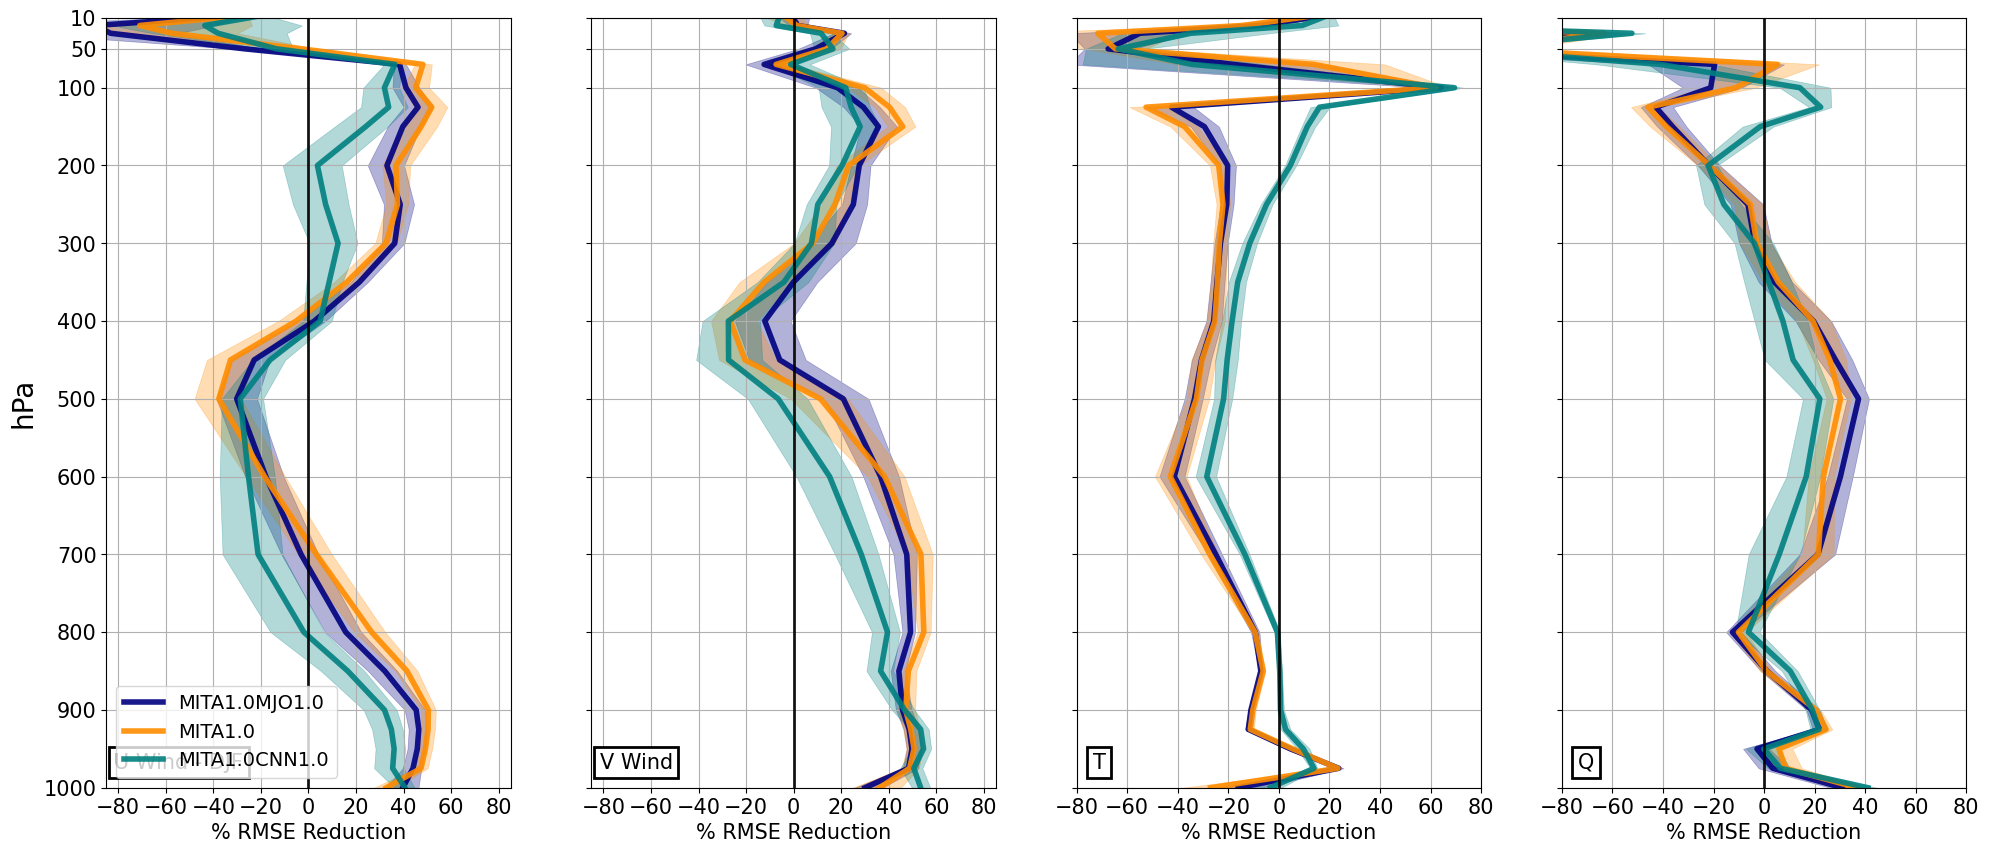

In [12]:


bbox_props = dict(fc="white", ec="k", lw=2)
SEAS='DJF'
SeasDict = {'DJF': 0, 'SON': 1, 'JJA': 2, 'MAM': 3}
td = SeasDict[SEAS]


fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0MJO1.0',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,100,20))
ax1.set_xlim([-85,85])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
ax1.text(0.02, 0.02, f'U Wind - {SEAS}', transform=ax1.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
ax2.plot(np.mean(V_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,100,20))
ax2.set_xlim([-85,85])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
ax2.text(0.02, 0.02, f'V Wind', transform=ax2.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)

################################################################
ax3.plot(np.mean(T_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,100,20))
ax3.set_xlim([-80,80])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)
ax3.text(0.04, 0.02, f'T', transform=ax3.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)


################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[td,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[td,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[td,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[td,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[td,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,100,20))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-80,80])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)
ax4.text(0.04, 0.02, f'Q', transform=ax4.transAxes, ha='left', va='bottom', fontsize=15, bbox=bbox_props)


### +++ saving
plt.savefig(f'./{SEAS}_Vert_AllSeason_vertical_MARITIME_RMSEperc.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

## TESTING BELOW:

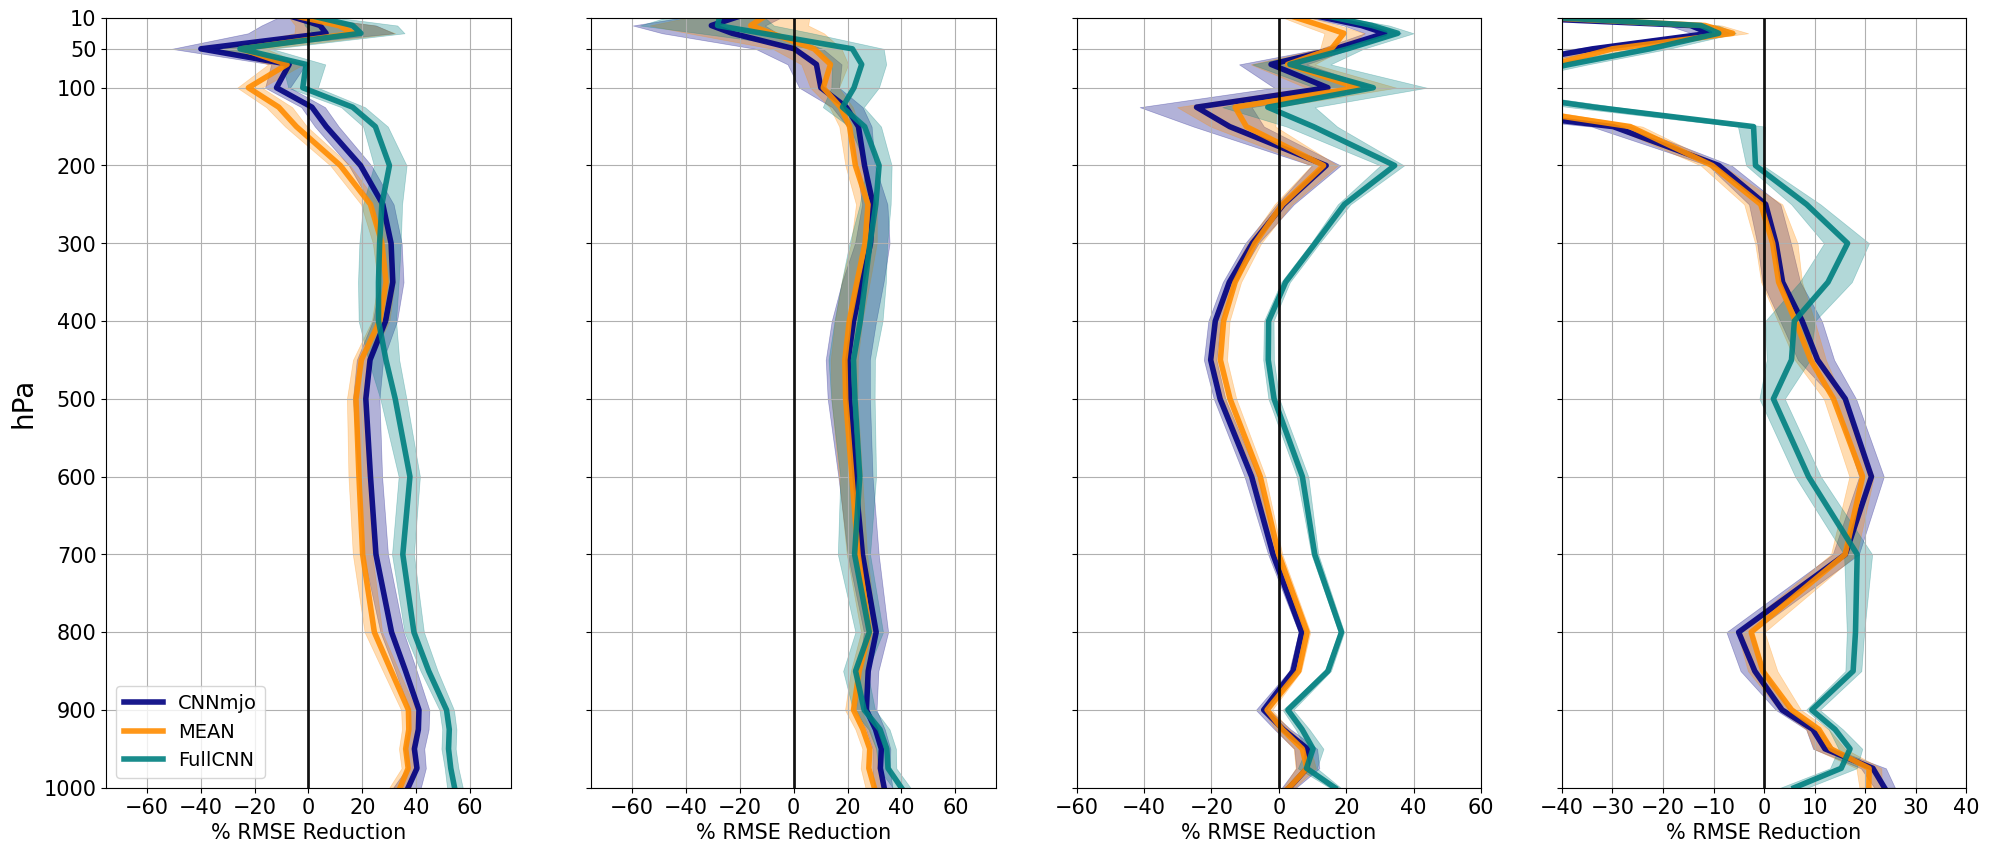

In [19]:

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN.3',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)


plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

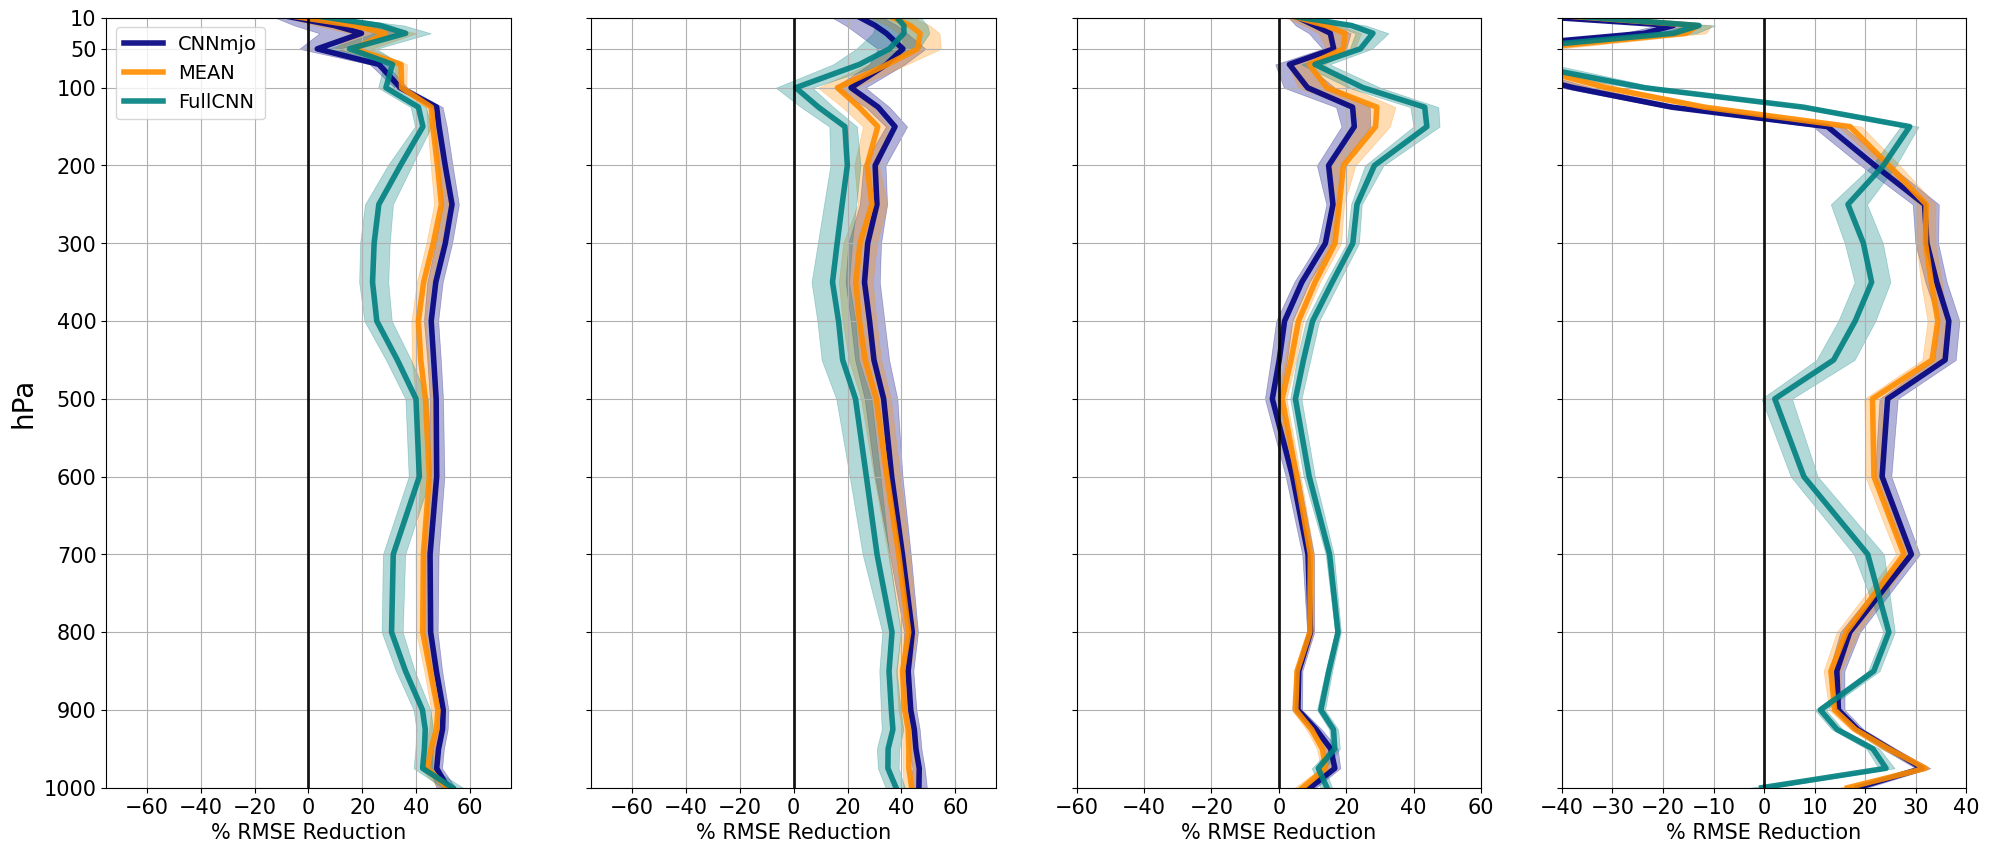

In [20]:

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)


plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

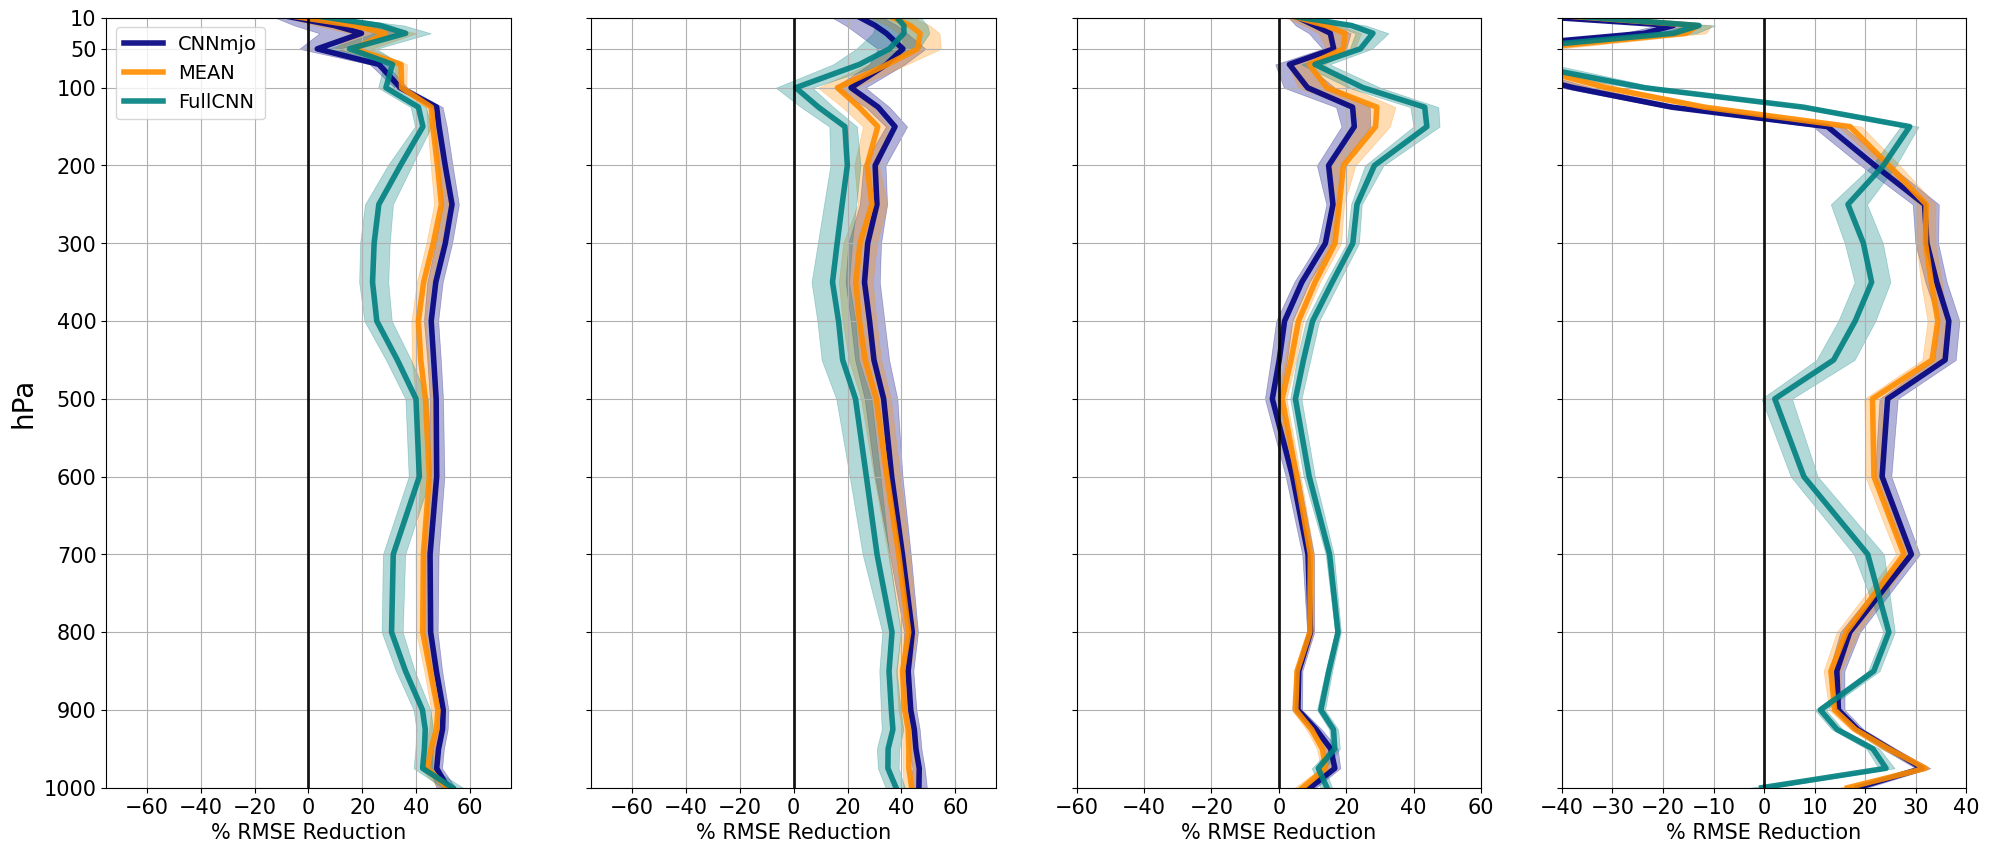

In [21]:

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[2,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[2,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[2,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[2,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[2,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)


plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

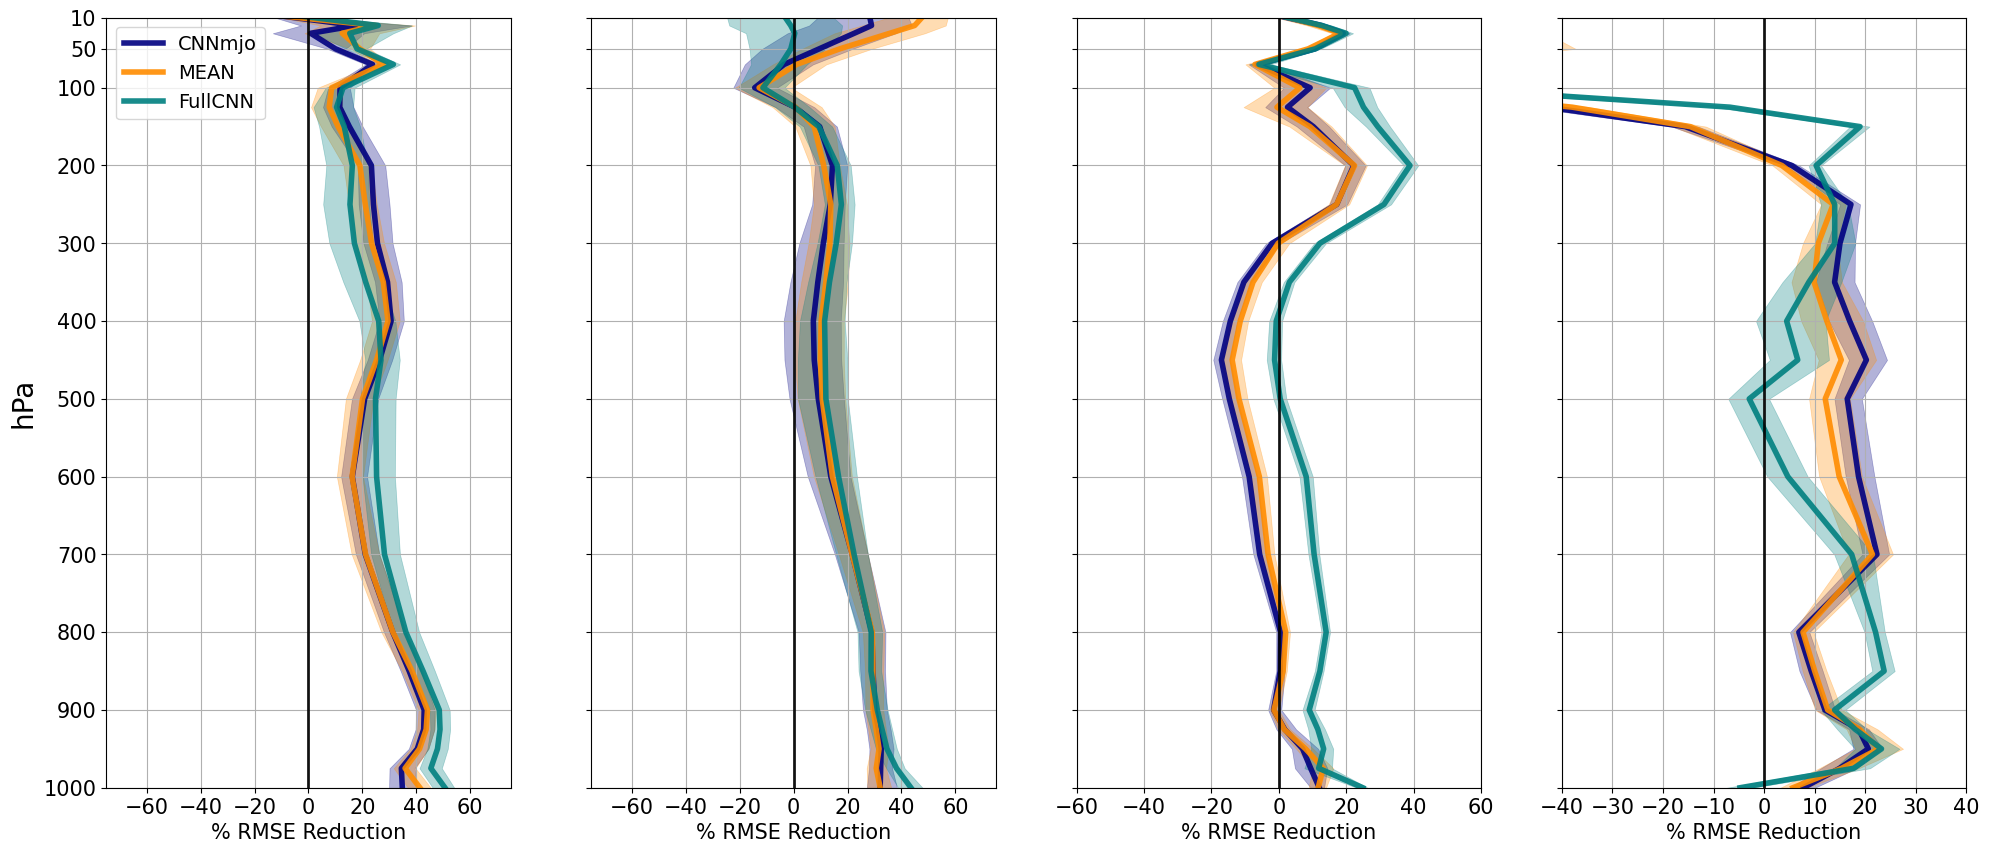

In [22]:

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[3,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[3,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[3,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-80,80,20))
ax1.set_xlim([-75,75])
ax1.set_xlabel('% RMSE Reduction',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[3,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[3,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[3,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-80,80,20))
ax2.set_xlim([-75,75])
ax2.set_xlabel('% RMSE Reduction',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[3,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[3,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[3,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-80,80,20))
ax3.set_xlim([-60,60])
ax3.set_xlabel('% RMSE Reduction',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[3,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[3,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[3,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[3,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_xticks(np.arange(-80,80,10))
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax4.set_xlim([-40,40])
ax4.set_xlabel('% RMSE Reduction',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)


plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

## BY RMSE

In [23]:
FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.U*.pkl'))

U_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    U_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    U_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    U_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.U*.pkl'))

U_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    U_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    U_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    U_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.U*.pkl'))

U_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    U_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    U_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    U_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    U_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.V*.pkl'))

V_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    V_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    V_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    V_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.V*.pkl'))

V_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    V_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    V_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    V_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.V*.pkl'))

V_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    V_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    V_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    V_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    V_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])

##########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.T*.pkl'))

T_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    T_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    T_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    T_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.T*.pkl'))

T_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    T_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    T_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    T_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.T*.pkl'))

T_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    T_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    T_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    T_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    T_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])

#########################################################################
##########################################################################
##########################################################################

FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_CNNmjo.cam.h0.Q*.pkl'))

Q_season_CNNmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_CNNmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    Q_season_CNNmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    Q_season_CNNmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    Q_season_CNNmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_MEANmjo.cam.h0.Q*.pkl'))

Q_season_MEANmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_MEANmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    Q_season_MEANmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    Q_season_MEANmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    Q_season_MEANmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])


FNS = sorted(glob.glob('./Bootstrapped/f.e.FTORCHmjo_meanGPU_exp001.cam.h0.Q*.pkl'))

Q_season_GPUmjo = np.zeros([4,len(FNS),25])

for ee,fn in enumerate(FNS):
    with open(fn, 'rb') as file:
        loaded_dict = pickle.load(file)
    
    Q_season_GPUmjo[0,ee,:] = np.array(loaded_dict['DJF_cntrl'])-np.array(loaded_dict['DJF_exp'])
    Q_season_GPUmjo[1,ee,:] = np.array(loaded_dict['SON_cntrl'])-np.array(loaded_dict['SON_exp'])
    Q_season_GPUmjo[2,ee,:] = np.array(loaded_dict['JJA_cntrl'])-np.array(loaded_dict['JJA_exp'])
    Q_season_GPUmjo[3,ee,:] = np.array(loaded_dict['MAM_cntrl'])-np.array(loaded_dict['MAM_exp'])



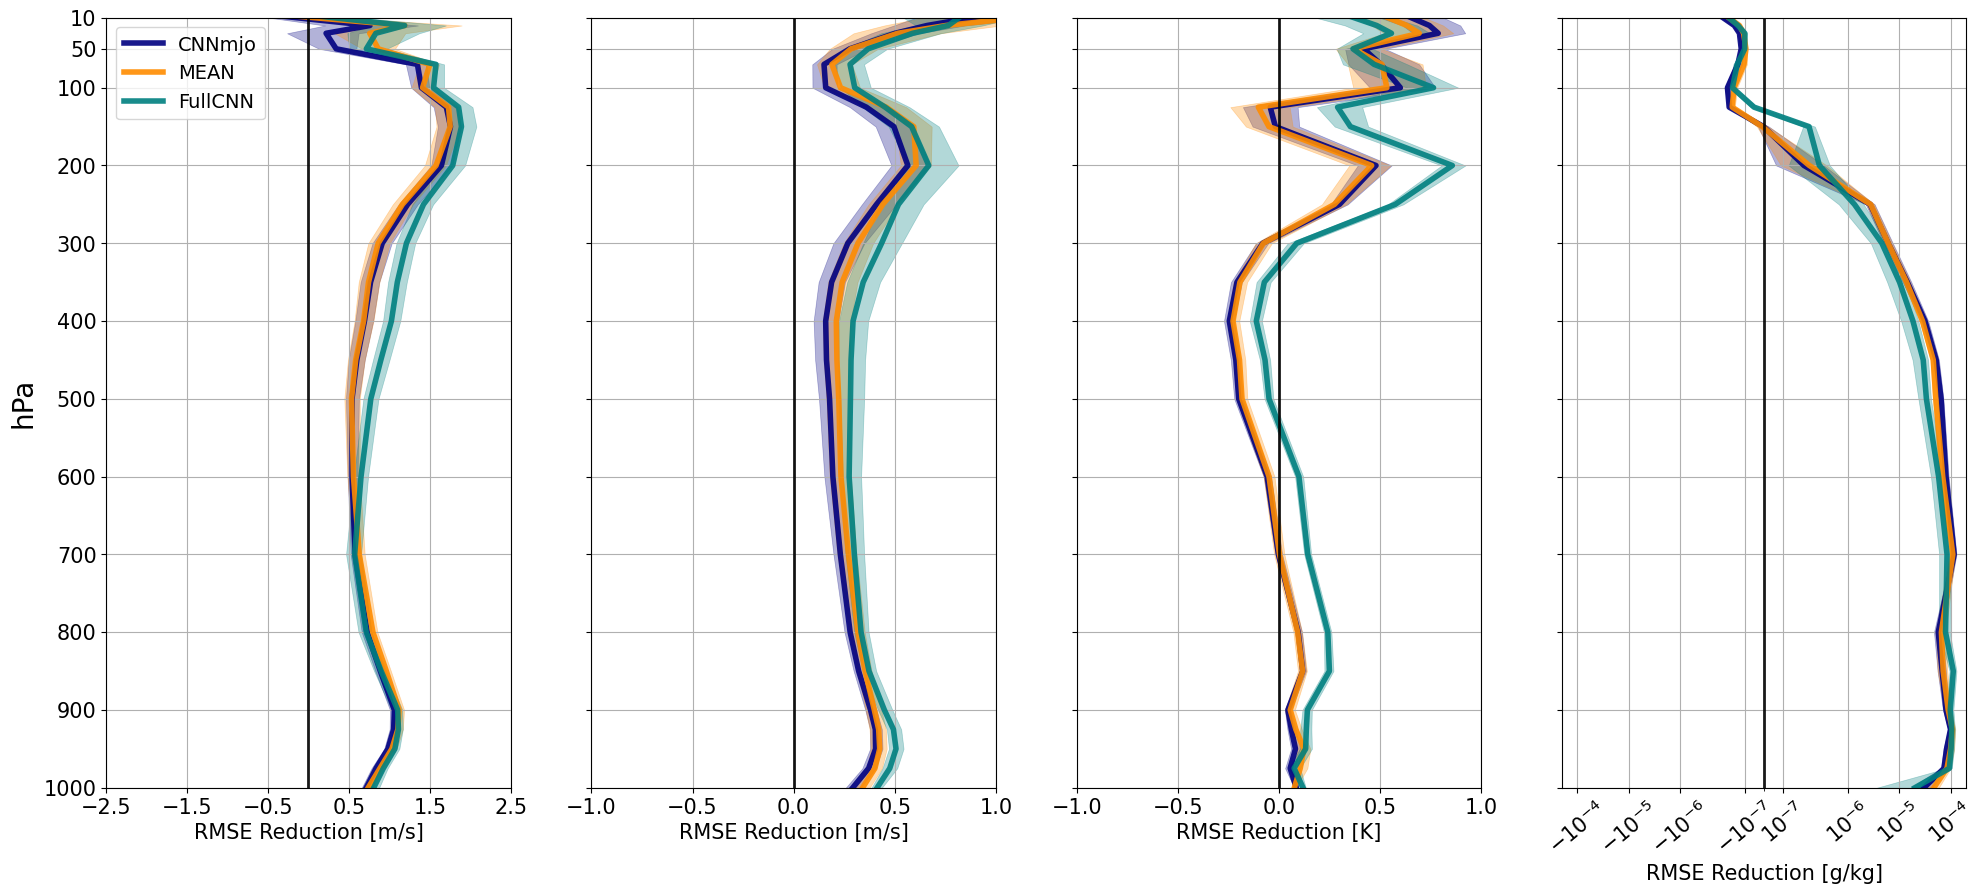

In [24]:
#DJF
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[0,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[0,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[0,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-3.5,3.5,1))
ax1.set_xlim([-2.5,2.5])
ax1.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[0,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[0,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[0,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-1.5,1.75,.5))
ax2.set_xlim([-1,1])
ax2.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[0,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[0,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[0,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-1.5,1.75,.5))
ax3.set_xlim([-1,1])
ax3.set_xlabel('RMSE Reduction [K]',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[0,:,:],.99,axis=0),np.quantile(Q_season_CNNmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[0,:,:],.99,axis=0),np.quantile(Q_season_MEANmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[0,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[0,:,:],.99,axis=0),np.quantile(Q_season_GPUmjo[0,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
# ax4.set_xticks(np.arange(-80,80,10))
# ax4.set_xlim([-40,40])
ax4.set_xlabel('RMSE Reduction [g/kg]',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Setting scientific notation for the x-axis
ax4.set_xscale('symlog', linthresh=0.0000003)
ax4.set_xticks([-1e-4,-1e-5,-1e-6,-1e-7,1e-4,1e-5,1e-6,1e-7])
ax4.set_xlim([-2e-4,2e-4])
plt.xticks(rotation=40)
plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

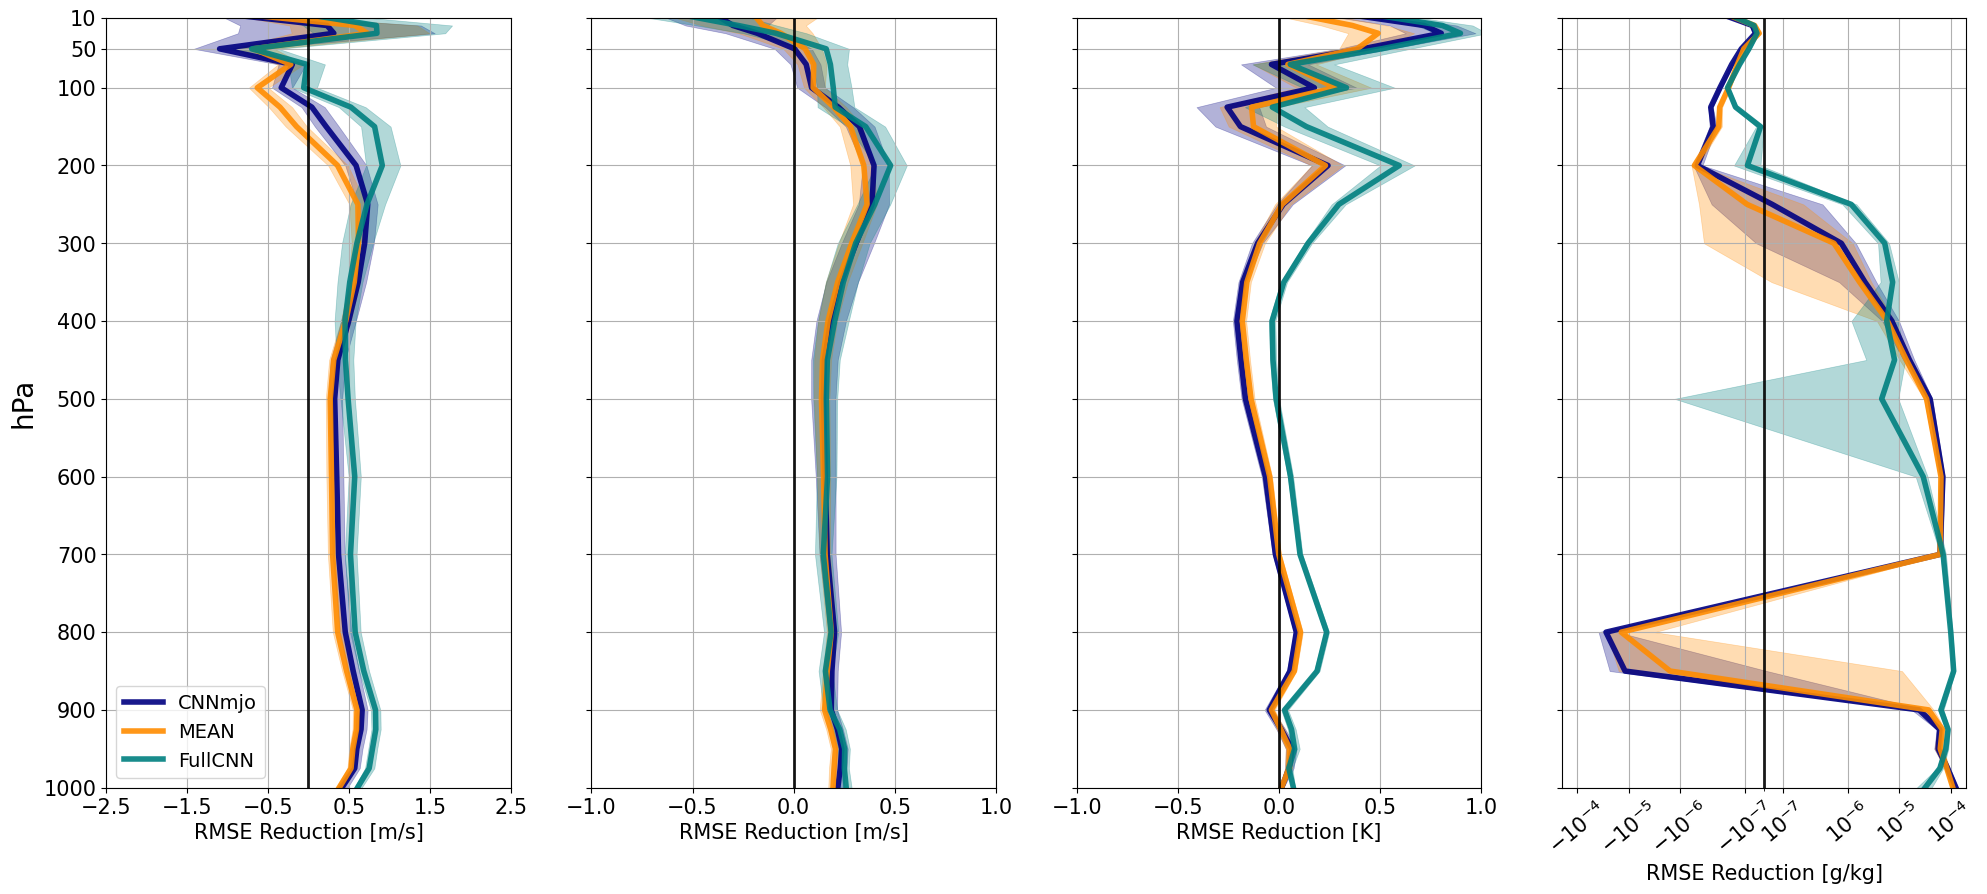

In [25]:
#DJF
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-3.5,3.5,1))
ax1.set_xlim([-2.5,2.5])
ax1.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-1.5,1.75,.5))
ax2.set_xlim([-1,1])
ax2.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-1.5,1.75,.5))
ax3.set_xlim([-1,1])
ax3.set_xlabel('RMSE Reduction [K]',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[1,:,:],.95,axis=0),np.quantile(Q_season_CNNmjo[1,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[1,:,:],.95,axis=0),np.quantile(Q_season_MEANmjo[1,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[1,:,:],.95,axis=0),np.quantile(Q_season_GPUmjo[1,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
# ax4.set_xticks(np.arange(-80,80,10))
# ax4.set_xlim([-40,40])
ax4.set_xlabel('RMSE Reduction [g/kg]',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Setting scientific notation for the x-axis
ax4.set_xscale('symlog', linthresh=0.0000003)
ax4.set_xticks([-1e-4,-1e-5,-1e-6,-1e-7,1e-4,1e-5,1e-6,1e-7])
ax4.set_xlim([-2e-4,2e-4])
plt.xticks(rotation=40)
plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()

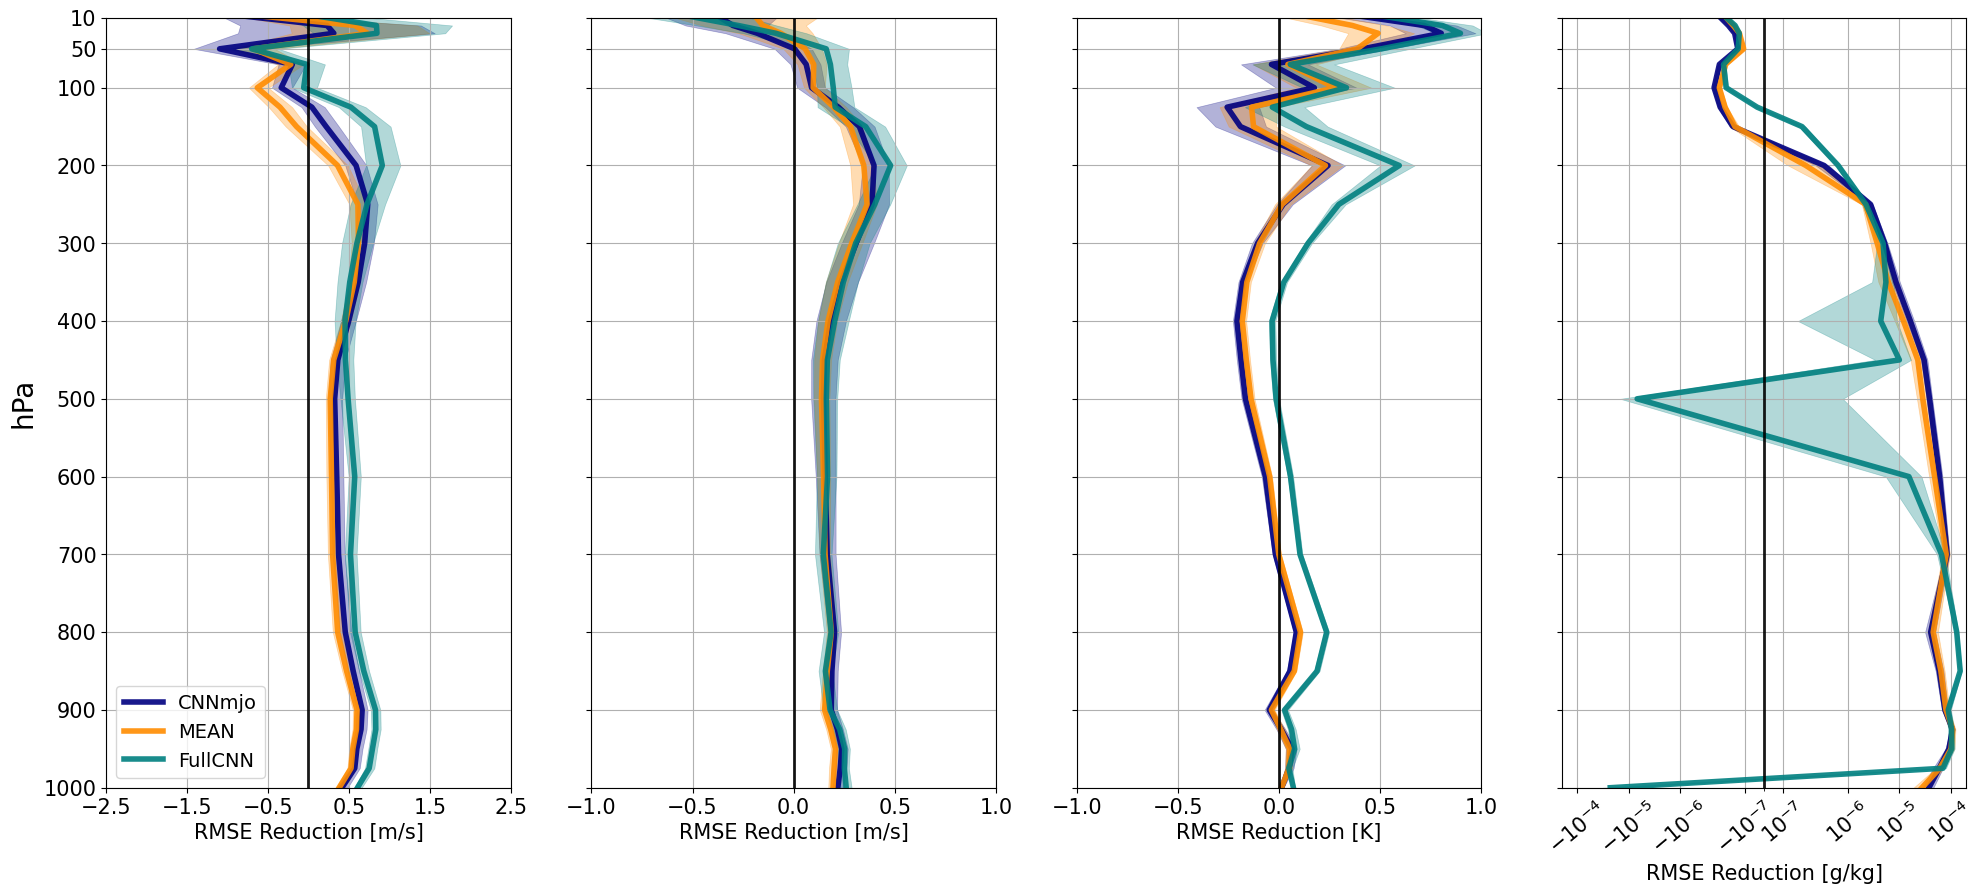

In [26]:
#DJF
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(24,10))
ax1.plot(np.mean(U_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(U_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax1.plot(np.mean(U_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(U_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax1.plot(np.mean(U_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax1.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(U_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(U_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax1.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax1.set_ylim([10,1000])
ax1.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax1.set_xticks(np.arange(-3.5,3.5,1))
ax1.set_xlim([-2.5,2.5])
ax1.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax1.set_ylabel('hPa',fontsize=20)
ax1.invert_yaxis()
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=15) 
ax1.grid(True)
################################################################
ax2.plot(np.mean(V_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(V_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax2.plot(np.mean(V_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(V_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax2.plot(np.mean(V_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax2.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(V_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(V_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax2.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax2.set_ylim([10,1000])
ax2.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax2.set_xticks(np.arange(-1.5,1.75,.5))
ax2.set_xlim([-1,1])
ax2.set_xlabel('RMSE Reduction [m/s]',fontsize=15)
ax2.invert_yaxis()
ax2.tick_params(labelsize=15) 
ax2.grid(True)
################################################################
ax3.plot(np.mean(T_season_CNNmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_CNNmjo[1,:,:],.99,axis=0),np.quantile(T_season_CNNmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax3.plot(np.mean(T_season_MEANmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_MEANmjo[1,:,:],.99,axis=0),np.quantile(T_season_MEANmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax3.plot(np.mean(T_season_GPUmjo[1,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax3.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(T_season_GPUmjo[1,:,:],.99,axis=0),np.quantile(T_season_GPUmjo[1,:,:],.01,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax3.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax3.set_ylim([10,1000])
ax3.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
ax3.set_xticks(np.arange(-1.5,1.75,.5))
ax3.set_xlim([-1,1])
ax3.set_xlabel('RMSE Reduction [K]',fontsize=15)
ax3.invert_yaxis()
ax3.tick_params(labelsize=15) 
ax3.grid(True)

################################################################

################################################################
ax4.plot(np.mean(Q_season_CNNmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='CNNmjo',linewidth=4, alpha=0.9, color='navy')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_CNNmjo[3,:,:],.95,axis=0),np.quantile(Q_season_CNNmjo[3,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='navy')

ax4.plot(np.mean(Q_season_MEANmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0',linewidth=4, alpha=0.9, color='darkorange')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_MEANmjo[3,:,:],.95,axis=0),np.quantile(Q_season_MEANmjo[3,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='darkorange')

ax4.plot(np.mean(Q_season_GPUmjo[3,:,:],axis=0),np.array(DS_cntrl['lev']),label='MITA1.0CNN1.0',linewidth=4, alpha=0.9, color='teal')
ax4.fill_betweenx(np.array(DS_cntrl['lev']),np.quantile(Q_season_GPUmjo[3,:,:],.95,axis=0),np.quantile(Q_season_GPUmjo[3,:,:],.05,axis=0), linewidth=0.5, alpha=0.3, color='teal')
ax4.plot([0,0],[0,1000],linewidth=2, alpha=0.9, color='k')
ax4.set_ylim([10,1000])
ax4.set_yticks([1000,900,800,700,600,500,400,300,200,100,50,10])
# ax4.set_xticks(np.arange(-80,80,10))
# ax4.set_xlim([-40,40])
ax4.set_xlabel('RMSE Reduction [g/kg]',fontsize=15)
ax4.invert_yaxis()
ax4.tick_params(labelsize=15) 
ax4.grid(True)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Setting scientific notation for the x-axis
ax4.set_xscale('symlog', linthresh=0.0000003)
ax4.set_xticks([-1e-4,-1e-5,-1e-6,-1e-7,1e-4,1e-5,1e-6,1e-7])
ax4.set_xlim([-2e-4,2e-4])
plt.xticks(rotation=40)
plt.show()
### +++ saving
# plt.savefig(f'{dir_exp}{SEAS}_{fin_exp}_AllSeason_vertical_RMSE.png', dpi=200, bbox_inches='tight')
### --- saving
plt.show()